In [82]:
file_suffices = ['12_12-31-19_.csv', 
                 '12_17-43-29_.csv',
                 '12_14-22-33_.csv',
                #  '12_13-48-57_.csv',
                #  '12_16-07-36_.csv',
                #  '12_15-31-04_.csv',
                #  '12_11-53-58_.csv',
                ]
schedulers = ['Baseline', 
          "Clockwork",
          "Round Robin",
          # "RR new quantum",
          # "RR starved first",
          # "RR adjust quantum times",
          # "SLA aware RR",
        ]

In [83]:
# find all files ending with some suffix

import os
import sys

def find_files(suffix, path):
    if not os.path.isdir(path):
        return
    result = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(suffix):
                # print(os.path.join(root, file))
                result.append(os.path.join(root, file))
    return result

In [84]:
find_files("12_12-31-19_.csv", "../logs") # baseline

['../logs/machine_66625_2024-06-12_12-31-19_.csv',
 '../logs/machine_733734_2024-06-12_12-31-19_.csv',
 '../logs/machine_24424_2024-06-12_12-31-19_.csv',
 '../logs/machine_479033_2024-06-12_12-31-19_.csv',
 '../logs/machine_544432_2024-06-12_12-31-19_.csv',
 '../logs/machine_223364_2024-06-12_12-31-19_.csv',
 '../logs/machine_275676_2024-06-12_12-31-19_.csv',
 '../logs/machine_797787_2024-06-12_12-31-19_.csv',
 '../logs/machine_280874_2024-06-12_12-31-19_.csv',
 '../logs/machine_385685_2024-06-12_12-31-19_.csv',
 '../logs/machine_340767_2024-06-12_12-31-19_.csv',
 '../logs/machine_478045_2024-06-12_12-31-19_.csv',
 '../logs/machine_755672_2024-06-12_12-31-19_.csv',
 '../logs/machine_896337_2024-06-12_12-31-19_.csv',
 '../logs/machine_594740_2024-06-12_12-31-19_.csv',
 '../logs/machine_378103_2024-06-12_12-31-19_.csv',
 '../logs/machine_611094_2024-06-12_12-31-19_.csv',
 '../logs/machine_87201_2024-06-12_12-31-19_.csv',
 '../logs/machine_783802_2024-06-12_12-31-19_.csv',
 '../logs/machi

In [85]:
files = find_files("12_12-31-19_.csv", "../logs")
print(files)

['../logs/machine_66625_2024-06-12_12-31-19_.csv', '../logs/machine_733734_2024-06-12_12-31-19_.csv', '../logs/machine_24424_2024-06-12_12-31-19_.csv', '../logs/machine_479033_2024-06-12_12-31-19_.csv', '../logs/machine_544432_2024-06-12_12-31-19_.csv', '../logs/machine_223364_2024-06-12_12-31-19_.csv', '../logs/machine_275676_2024-06-12_12-31-19_.csv', '../logs/machine_797787_2024-06-12_12-31-19_.csv', '../logs/machine_280874_2024-06-12_12-31-19_.csv', '../logs/machine_385685_2024-06-12_12-31-19_.csv', '../logs/machine_340767_2024-06-12_12-31-19_.csv', '../logs/machine_478045_2024-06-12_12-31-19_.csv', '../logs/machine_755672_2024-06-12_12-31-19_.csv', '../logs/machine_896337_2024-06-12_12-31-19_.csv', '../logs/machine_594740_2024-06-12_12-31-19_.csv', '../logs/machine_378103_2024-06-12_12-31-19_.csv', '../logs/machine_611094_2024-06-12_12-31-19_.csv', '../logs/machine_87201_2024-06-12_12-31-19_.csv', '../logs/machine_783802_2024-06-12_12-31-19_.csv', '../logs/machine_989010_2024-06-1

In [86]:
import pandas as pd
from datetime import datetime

In [87]:
def calculate_loading_time(files):
    loading_timestamps = {}
    loading_sums= {}

    for file in files:
        df = pd.read_csv(file, header=None)
        # iterate over rows with iterrows
        for index, row in df.iterrows():
            model, action = row[0].split('#')
            if action == 'load_start':
                loading_timestamps[model] = row[1]
            if action == 'load_end':
                end_time = datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S.%f').timestamp()
                start_time = datetime.strptime(loading_timestamps[model], '%Y-%m-%d %H:%M:%S.%f').timestamp()

                loading_sums[model] = end_time - start_time + loading_sums.get(model, 0)

    return sum(loading_sums.values())


In [88]:
loading_times = {}
for scheduler, suffix in zip(schedulers, file_suffices):
    files = find_files(suffix, "../logs")
    loading_times[scheduler] = calculate_loading_time(files)

print(loading_times)

{'Baseline': 1931.5138177871704, 'Clockwork': 1061.2364687919617, 'Round Robin': 857.8052177429199}


Baseline: 1931.51
Clockwork: 1061.24
Round Robin: 857.81


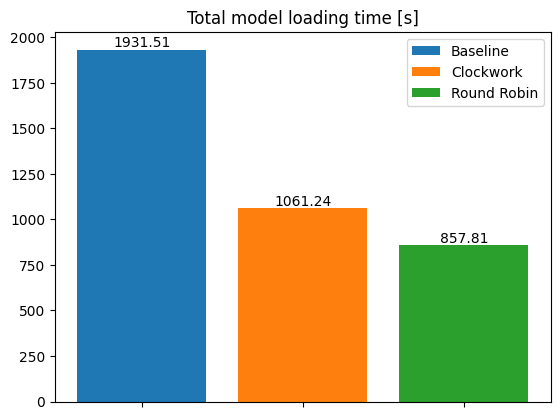

In [90]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for scheduler, loading_time in loading_times.items():
    print(f"{scheduler}: {loading_time:.2f}")

    ax.bar(scheduler, loading_time)
    ax.text(scheduler, loading_time, f"{loading_time:.2f}", ha='center', va='bottom')

    # add smaller legend with scheduler names
    ax.legend(schedulers, loc='upper right')
    ax.set_xticklabels([])
    ax.title.set_text('Total model loading time [s]')

# plt.show()
plt.savefig('total_model_loading_time.svg')